# General characteristics of the data set

To get a basic idea about the data set let's start by looking at it and making some general plots. For now we will work with a smaller data set to make evrything run smooth but feel free to switch to the larger one if you fell like it.

We start by importing the data. The ID denoted is actually a string and not a number. So to avoid having pandas round it to the nearest digit we will convert the IDs to strings as well.

In [1]:
import pandas as pd

abundances = pd.read_csv("../data/american_gut_genus.csv")
abundances.id = abundances.id.astype("str")
abundances.head()

/Users/cdiener/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,count,Kingdom,Phylum,Class,Order,Family,Genus,count.1
0,10317.000012326,3214,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Muribaculaceae,NaN,3214
1,10317.000012326,2260,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,2260
2,10317.000012326,1452,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Coprococcus_2,1452
3,10317.000012326,1371,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,1371
4,10317.000012326,862,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,862


Here `id` denotes the individual the sample came from and count the number of sequencing reads for the particular bacterial genus. All the other columns denote the taxonomy of that genus.

To get an idea of what bacteria are the most predominant in our individuals we can obtain their distribution at a higher taxonomy level. For instance to summarize on the Phylum:

In [2]:
phyla = abundances.groupby(["id", "Phylum"])["count"].sum().reset_index()
phyla.head()

,id,Phylum,count
0,10317.000001000,Actinobacteria,9
1,10317.000001000,Bacteroidetes,1217
2,10317.000001000,Firmicutes,597
3,10317.000001000,Proteobacteria,8
4,10317.000001000,Tenericutes,35


Seems like Bacteroidetes and Firmicutes are pretty abundant. Let's visualize that for all individuals: 

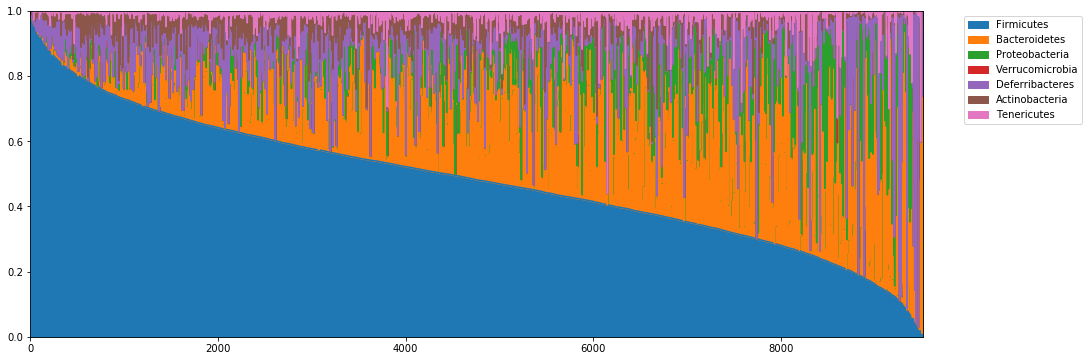

In [3]:
%matplotlib inline
from helpers import filled_bar

filled_bar(phyla)